In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing 

In [3]:
stock=pd.read_csv("C:\\Users\\Siva\\Desktop\\ExcelR\\Project\\AAPL.csv")
stock

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
1,2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2,2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
3,2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
4,2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100
...,...,...,...,...,...,...,...
2006,2019-12-23,280.529999,284.250000,280.369995,284.000000,282.054138,24643000
2007,2019-12-24,284.690002,284.890015,282.920013,284.269989,282.322266,12119700
2008,2019-12-26,284.820007,289.980011,284.700012,289.910004,287.923645,23280300
2009,2019-12-27,291.119995,293.970001,288.119995,289.799988,287.814392,36566500


In [9]:
train=stock.iloc[:1501,:]
test=stock.iloc[1501:,:]
test

,Date,Open,High,Low,Close,Adj Close,Volume
1501,2017-12-19,175.029999,175.389999,174.089996,174.539993,168.252151,27436400
1502,2017-12-20,174.869995,175.419998,173.250000,174.350006,168.069016,23475600
1503,2017-12-21,174.169998,176.020004,174.100006,175.009995,168.705246,20949900
1504,2017-12-22,174.679993,175.419998,174.500000,175.009995,168.705246,16349400
1505,2017-12-26,170.800003,171.470001,169.679993,170.570007,164.425217,33185500
...,...,...,...,...,...,...,...
2006,2019-12-23,280.529999,284.250000,280.369995,284.000000,282.054138,24643000
2007,2019-12-24,284.690002,284.890015,282.920013,284.269989,282.322266,12119700
2008,2019-12-26,284.820007,289.980011,284.700012,289.910004,287.923645,23280300
2009,2019-12-27,291.119995,293.970001,288.119995,289.799988,287.814392,36566500


In [10]:
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp) 

In [11]:
import sklearn.metrics  
def RMSE(pred,org):
    value=np.sqrt(sklearn.metrics.mean_squared_error(org, pred)  )
    return value


# Model Creation

### Simple exponential model

In [16]:
ses_model = SimpleExpSmoothing(train["Close"]).fit(smoothing_level=0.2)
pred_ses_train = ses_model.predict(start = train.index[0],end = train.index[-1])
pred_ses_test = ses_model.predict(start = test.index[0],end = test.index[-1])
print("Test MAPE :",MAPE(pred_ses_test,test.Close))
print('Test RMSE:' ,RMSE(pred_ses_test,test.Close))

Test MAPE : 13.093405771585294
Test RMSE: 38.94997951180828


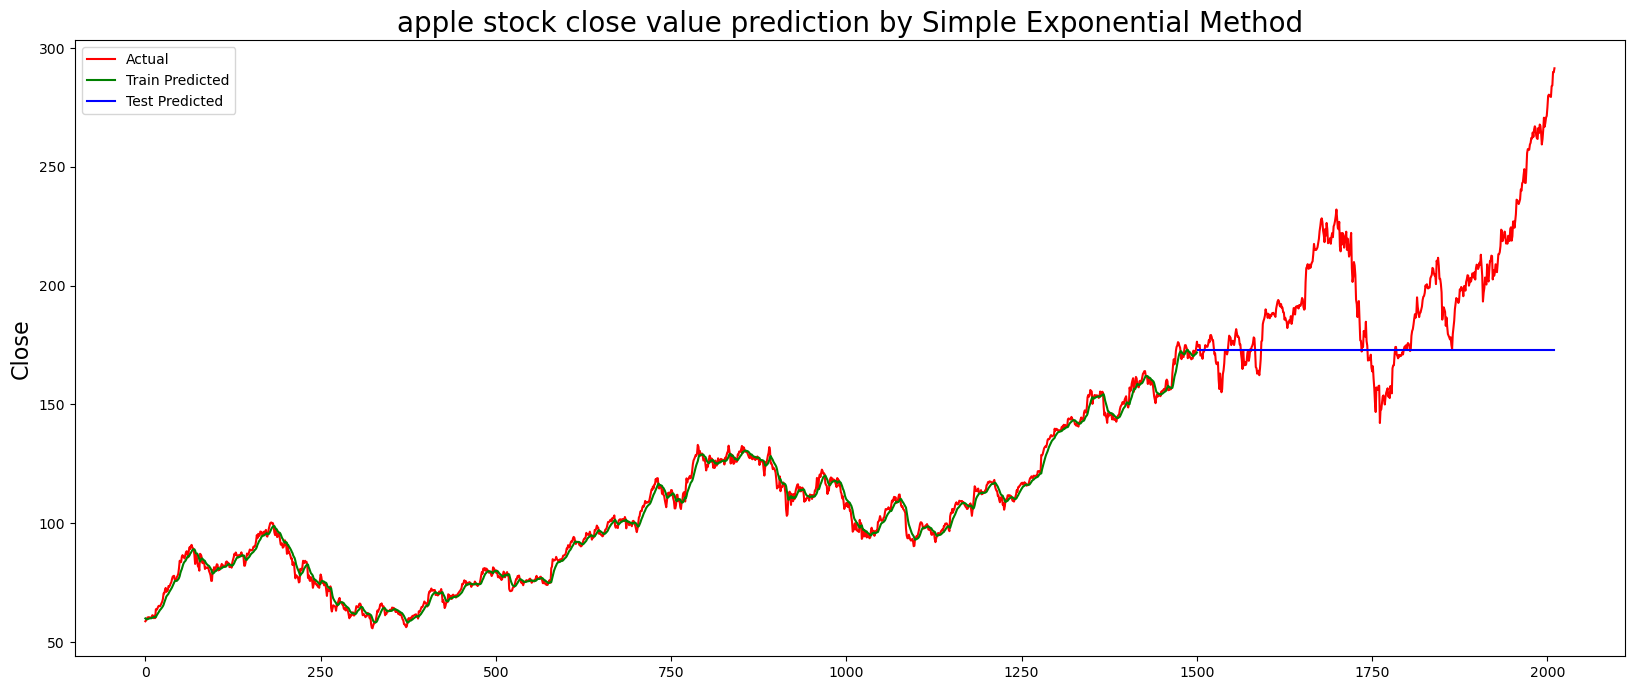

In [17]:
plt.figure(figsize=(20,8))
plt.plot(stock.Close, color='red',label="Actual")
plt.plot(pred_ses_train, color='green',label="Train Predicted")
plt.plot(pred_ses_test, color='blue', label="Test Predicted",)
plt.title('apple stock close value prediction by Simple Exponential Method', fontsize=20)
plt.ylabel('Close', fontsize=16)
plt.legend()
plt.show()

### Holt method

In [18]:
holt_model = Holt(train["Close"]).fit(smoothing_level=0.2, smoothing_trend=0.15)
pred_holt_train = holt_model.predict(start = train.index[0],end = train.index[-1])
pred_holt_test = holt_model.predict(start = test.index[0],end = test.index[-1])
print("Test MAPE :",MAPE(pred_holt_test,test.Close))
print('Test RMSE:' ,RMSE(pred_holt_test,test.Close))

Test MAPE : 11.611232007689274
Test RMSE: 27.313810094428785


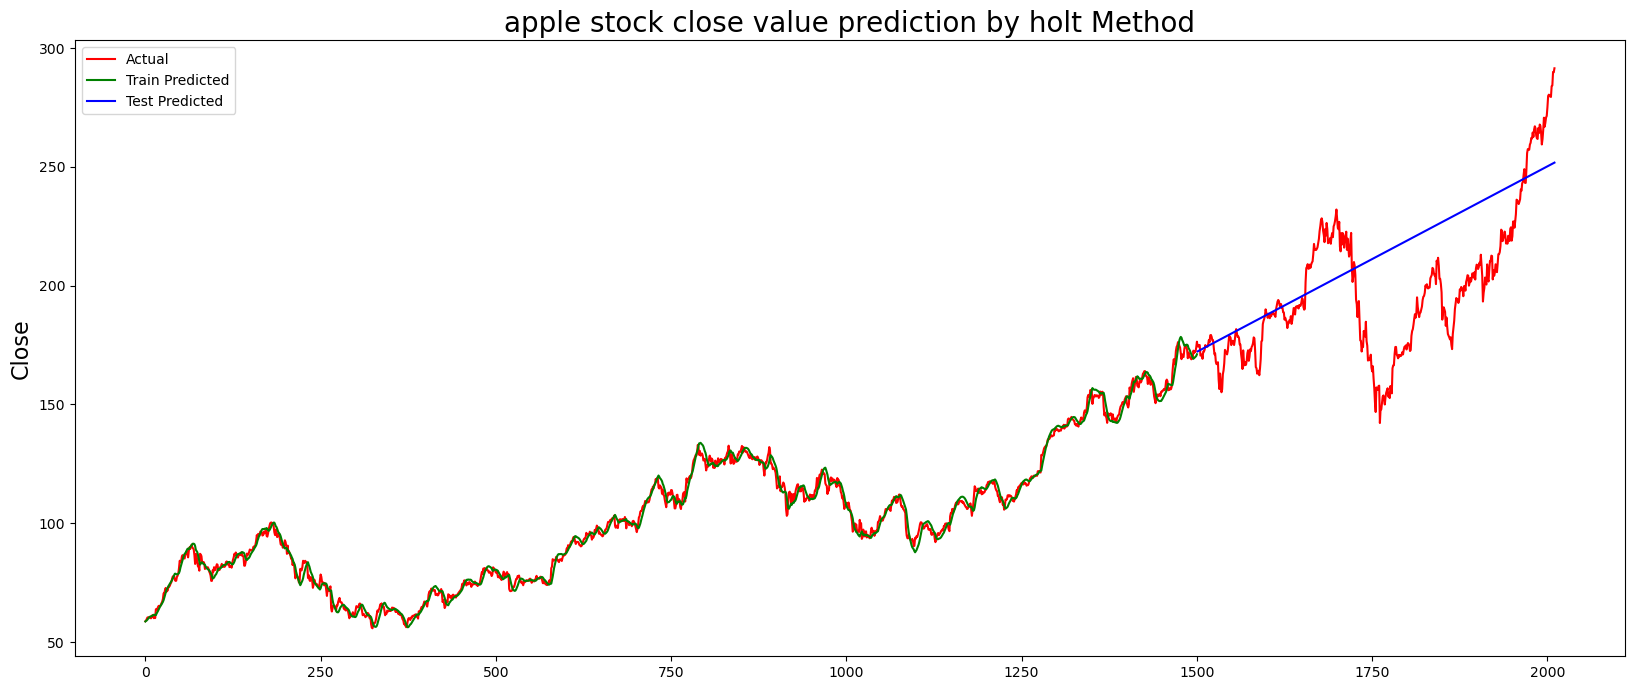

In [25]:
plt.figure(figsize=(20,8))
plt.plot(stock.Close, color='red',label="Actual")
plt.plot(pred_holt_train, color='green',label="Train Predicted")
plt.plot(pred_holt_test, color='blue', label="Test Predicted",)
plt.title('apple stock close value prediction by holt Method', fontsize=20)
plt.ylabel('Close', fontsize=16)
plt.legend()
plt.show()

### Holt winter

In [26]:
hwe_add_model1 = ExponentialSmoothing(train["Close"],seasonal="add",trend="add",seasonal_periods=63).fit()
pred_hwe_add_train1 = hwe_add_model1.predict(start = train.index[0],end = train.index[-1])
pred_hwe_add_test1 = hwe_add_model1.predict(start = test.index[0],end = test.index[-1])
print("Test MAPE :",MAPE(pred_hwe_add_test1,test.Close))
print('Test RMSE:' ,RMSE(pred_hwe_add_test1,test.Close))

Test MAPE : 8.91087954867349
Test RMSE: 24.21149091166207


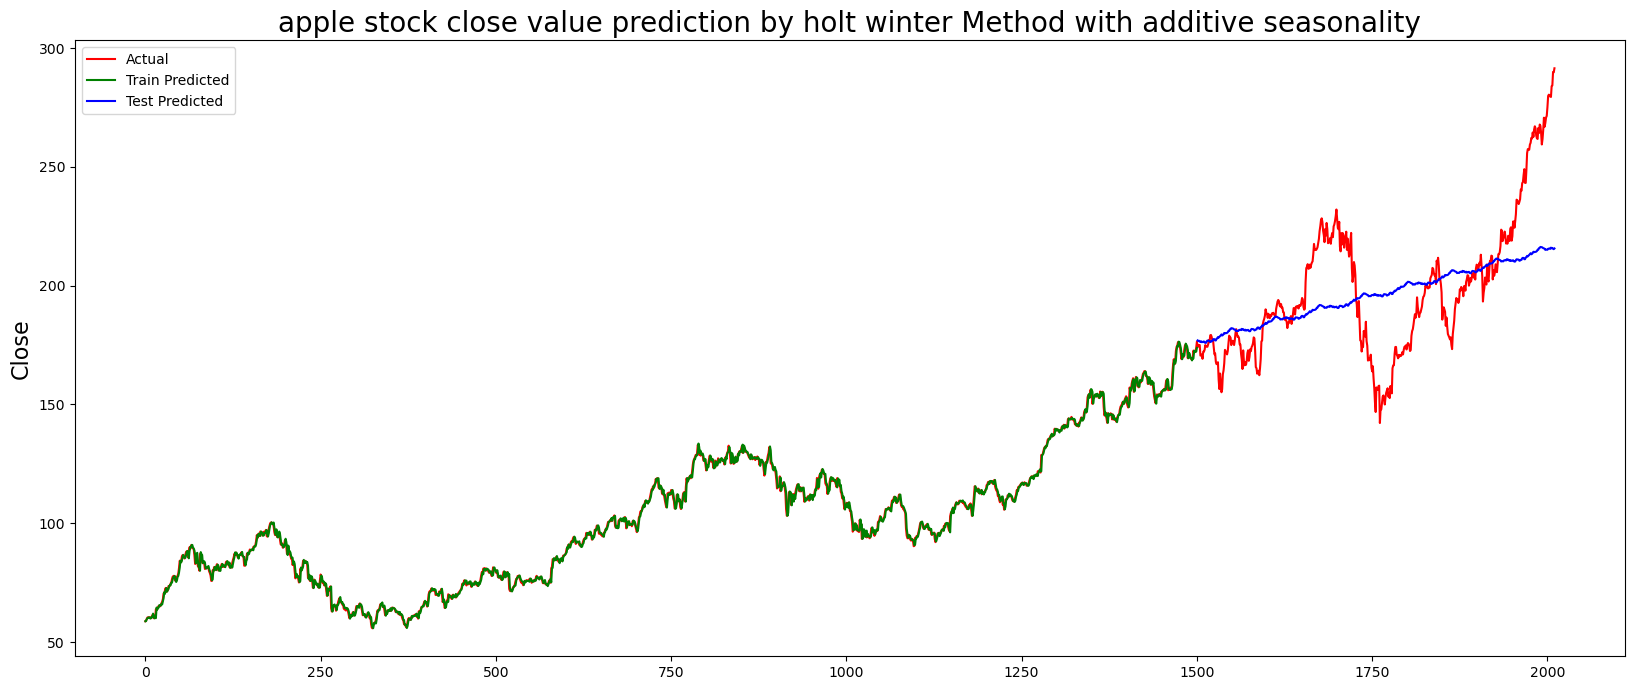

In [27]:
plt.figure(figsize=(20,8))
plt.plot(stock.Close, color='red',label="Actual")
plt.plot(pred_hwe_add_train1, color='green',label="Train Predicted")
plt.plot(pred_hwe_add_test1, color='blue', label="Test Predicted",)
plt.title('apple stock close value prediction by holt winter Method with additive seasonality', fontsize=20)
plt.ylabel('Close', fontsize=16)
plt.legend()
plt.show()

In [28]:
hwe_add_model2 = ExponentialSmoothing(train["Close"],seasonal="add",trend="add",seasonal_periods=126).fit()
pred_hwe_add_train2 = hwe_add_model2.predict(start = train.index[0],end = train.index[-1])
pred_hwe_add_test2 = hwe_add_model2.predict(start = test.index[0],end = test.index[-1])
print("Test MAPE :",MAPE(pred_hwe_add_test2,test.Close))
print('Test RMSE:' ,RMSE(pred_hwe_add_test2,test.Close))

Test MAPE : 8.986863867932247
Test RMSE: 23.71724716739015


C:\Users\Siva\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


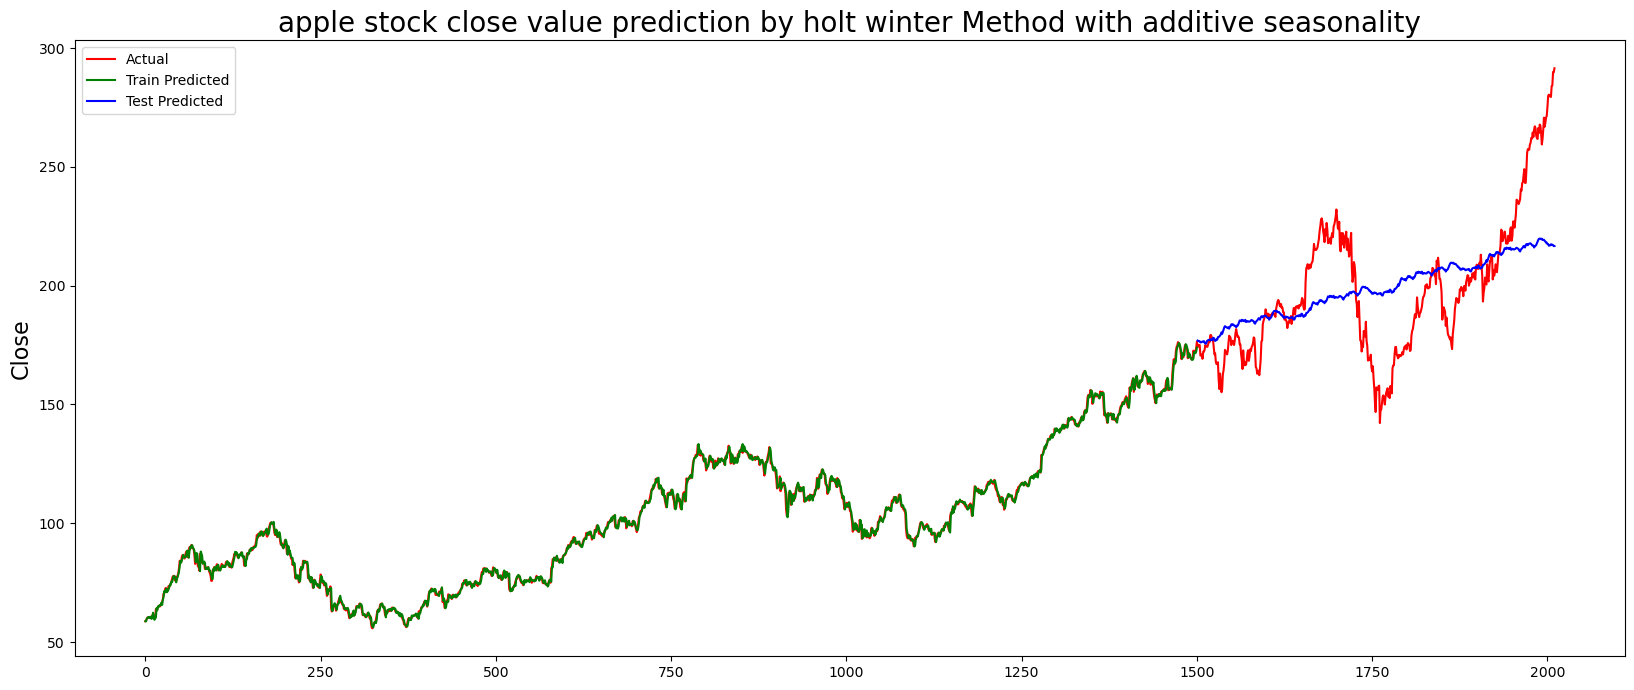

In [29]:
plt.figure(figsize=(20,8))
plt.plot(stock.Close, color='red',label="Actual")
plt.plot(pred_hwe_add_train2, color='green',label="Train Predicted")
plt.plot(pred_hwe_add_test2, color='blue', label="Test Predicted",)
plt.title('apple stock close value prediction by holt winter Method with additive seasonality', fontsize=20)
plt.ylabel('Close', fontsize=16)
plt.legend()
plt.show()

In [30]:
hwe_add_model3 = ExponentialSmoothing(train["Close"],seasonal="add",trend="add",seasonal_periods=252).fit()
pred_hwe_add_train3 = hwe_add_model3.predict(start = train.index[0],end = train.index[-1])
pred_hwe_add_test3 = hwe_add_model3.predict(start = test.index[0],end = test.index[-1])
print("Test MAPE :",MAPE(pred_hwe_add_test3,test.Close))
print('Test RMSE:' ,RMSE(pred_hwe_add_test3,test.Close))

Test MAPE : 8.66898282172789
Test RMSE: 23.540730044172825


C:\Users\Siva\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


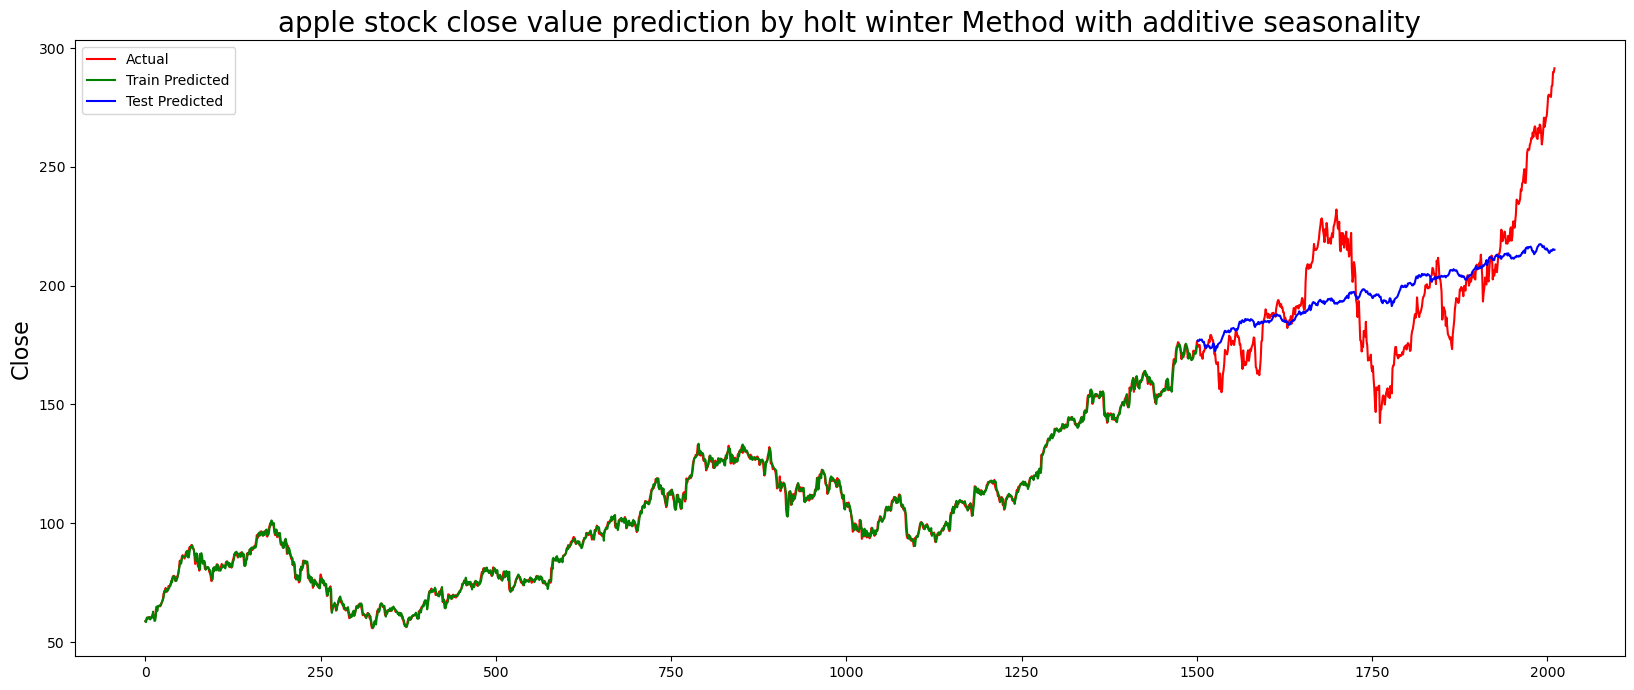

In [31]:
plt.figure(figsize=(20,8))
plt.plot(stock.Close, color='red',label="Actual")
plt.plot(pred_hwe_add_train3, color='green',label="Train Predicted")
plt.plot(pred_hwe_add_test3, color='blue', label="Test Predicted",)
plt.title('apple stock close value prediction by holt winter Method with additive seasonality', fontsize=20)
plt.ylabel('Close', fontsize=16)
plt.legend()
plt.show()

### Holt winter with multiplicative seasonality and additive trend

In [39]:
hwe_muladd_model1 = ExponentialSmoothing(train["Close"],seasonal="mul",trend="add",seasonal_periods=63).fit()
pred_hwe_muladd_train1 = hwe_muladd_model1.predict(start = train.index[0],end = train.index[-1])
pred_hwe_muladd_test1 = hwe_muladd_model1.predict(start = test.index[0],end = test.index[-1])
print("Test MAPE :",MAPE(pred_hwe_muladd_test1,test.Close))
print('Test RMSE:' ,RMSE(pred_hwe_muladd_test1,test.Close))

Test MAPE : 8.959855571729777
Test RMSE: 24.196290603111585


C:\Users\Siva\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


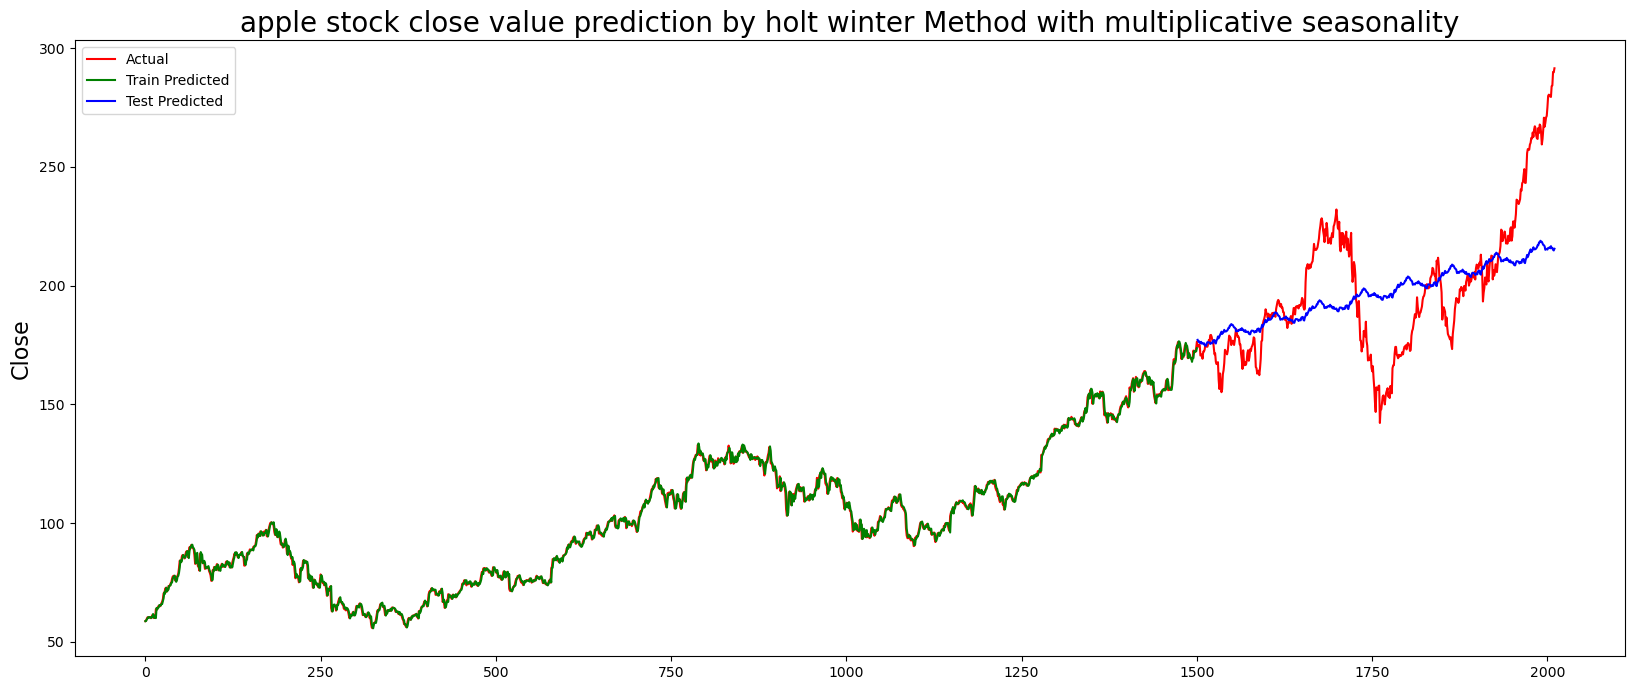

In [63]:
plt.figure(figsize=(20,8))
plt.plot(stock.Close, color='red',label="Actual")
plt.plot(pred_hwe_muladd_train1, color='green',label="Train Predicted")
plt.plot(pred_hwe_muladd_test1, color='blue', label="Test Predicted",)
plt.title('apple stock close value prediction by holt winter Method with multiplicative seasonality', fontsize=20)
plt.ylabel('Close', fontsize=16)
plt.legend()
plt.show()

In [41]:
hwe_muladd_model2 = ExponentialSmoothing(train["Close"],seasonal="mul",trend="add",seasonal_periods=126).fit()
pred_hwe_muladd_train2 = hwe_muladd_model2.predict(start = train.index[0],end = train.index[-1])
pred_hwe_muladd_test2 = hwe_muladd_model2.predict(start = test.index[0],end = test.index[-1])
print("Test MAPE :",MAPE(pred_hwe_muladd_test2,test.Close))
print('Test RMSE:' ,RMSE(pred_hwe_muladd_test2,test.Close))

Test MAPE : 9.119185814657866
Test RMSE: 23.576020652820592


C:\Users\Siva\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


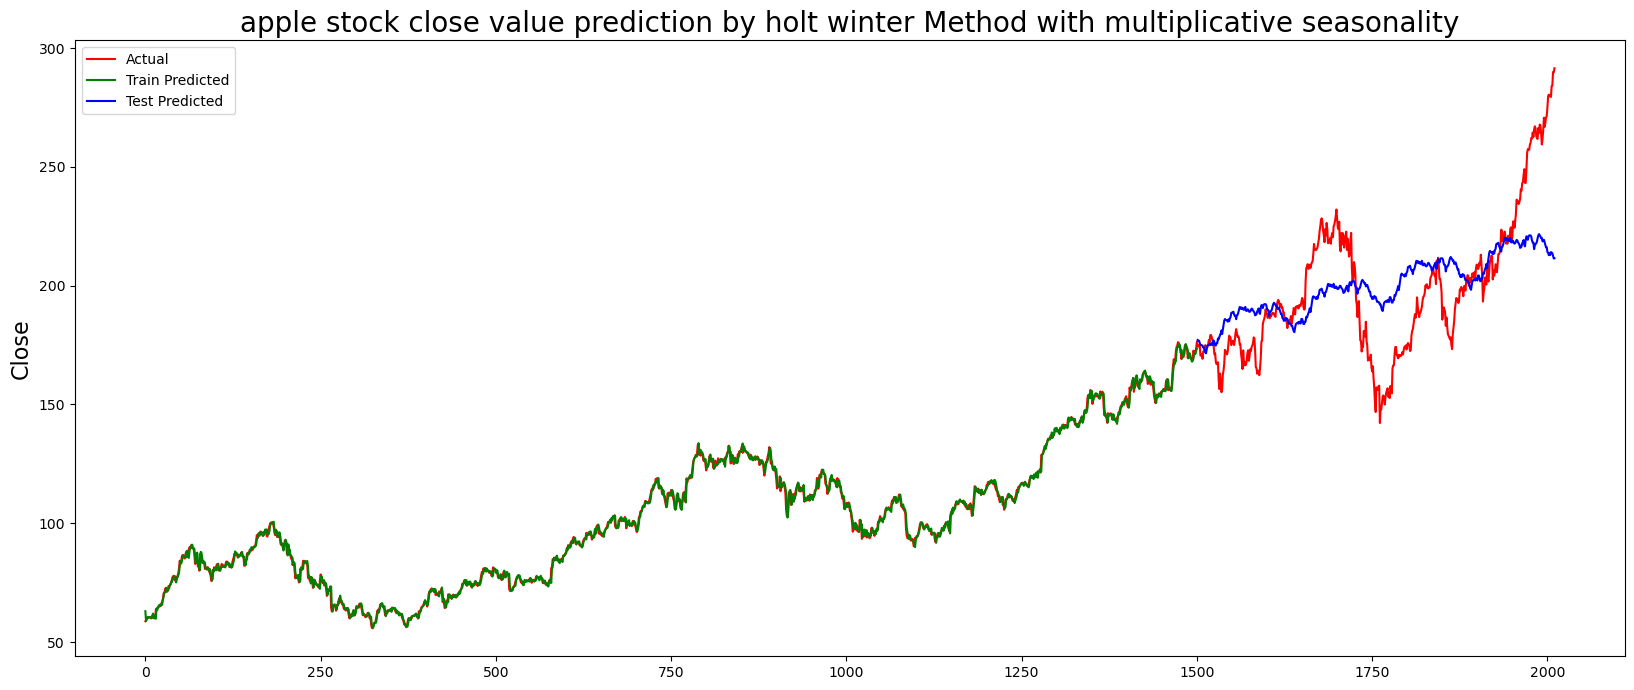

In [62]:
plt.figure(figsize=(20,8))
plt.plot(stock.Close, color='red',label="Actual")
plt.plot(pred_hwe_muladd_train2, color='green',label="Train Predicted")
plt.plot(pred_hwe_muladd_test2, color='blue', label="Test Predicted",)
plt.title('apple stock close value prediction by holt winter Method with multiplicative seasonality', fontsize=20)
plt.ylabel('Close', fontsize=16)
plt.legend()
plt.show()

In [44]:
hwe_muladd_model3 = ExponentialSmoothing(train["Close"],seasonal="mul",trend="add",seasonal_periods=252).fit()
pred_hwe_muladd_train3 = hwe_muladd_model3.predict(start = train.index[0],end = train.index[-1])
pred_hwe_muladd_test3 = hwe_muladd_model3.predict(start = test.index[0],end = test.index[-1])
print("Test MAPE :",MAPE(pred_hwe_muladd_test3,test.Close))
print('Test RMSE:' ,RMSE(pred_hwe_muladd_test3,test.Close))

Test MAPE : 8.814879463735698
Test RMSE: 23.436940346601737


C:\Users\Siva\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


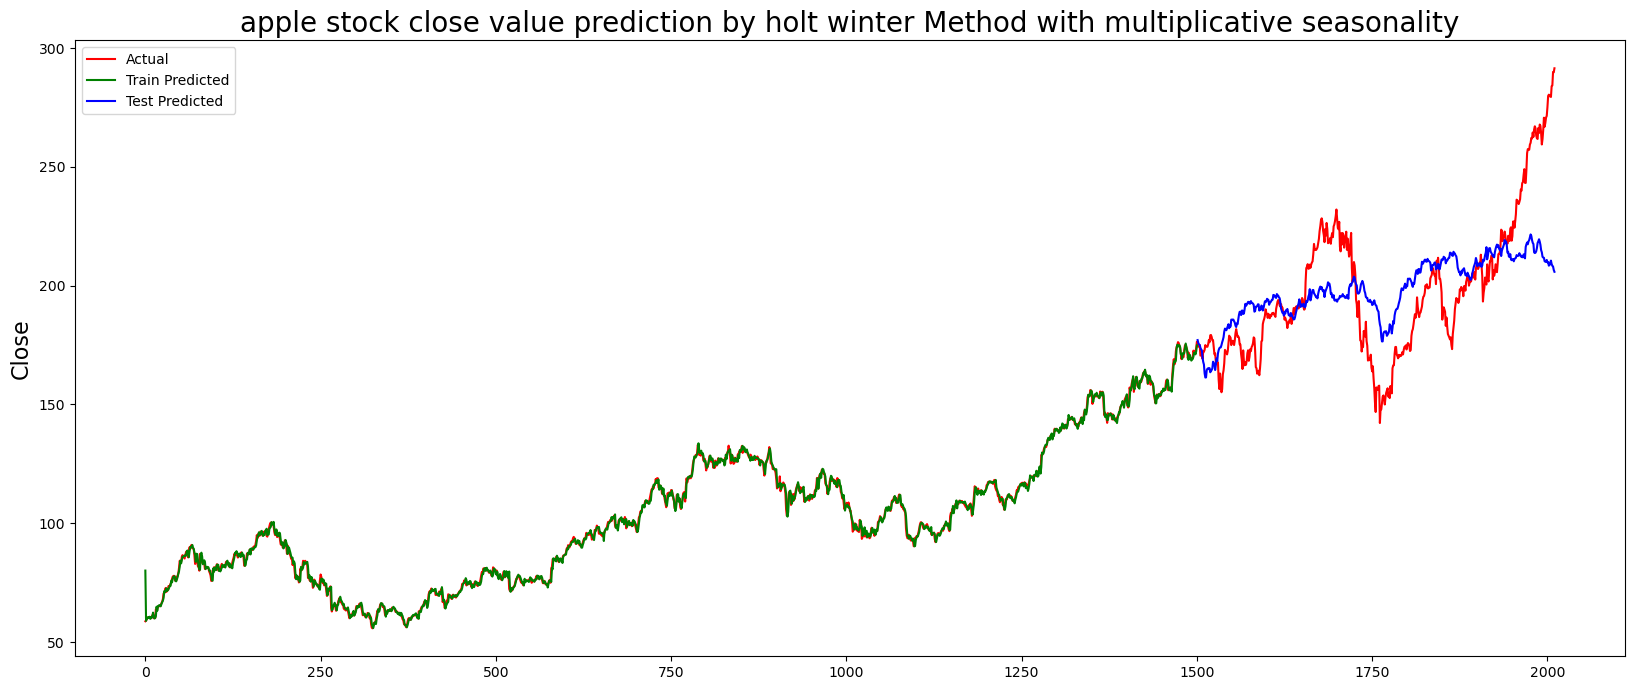

In [61]:
plt.figure(figsize=(20,8))
plt.plot(stock.Close, color='red',label="Actual")
plt.plot(pred_hwe_muladd_train3, color='green',label="Train Predicted")
plt.plot(pred_hwe_muladd_test3, color='blue', label="Test Predicted",)
plt.title('apple stock close value prediction by holt winter Method with multiplicative seasonality', fontsize=20)
plt.ylabel('Close', fontsize=16)
plt.legend()
plt.show()

#### Baed on the RMSE value and plots between preditcted vs actual.... Holts wintermodel multiplicative seasonality and additive trend is the best fit for prediction

In [53]:
hwe_muladd_model = ExponentialSmoothing(stock["Close"],seasonal="mul",trend="add",seasonal_periods=252).fit()
pred_hwe_muladd_model = hwe_muladd_model.predict(start = stock.index[0],end = stock.index[-1])

print("MAPE :",MAPE(pred_hwe_muladd_model, stock.Close))
print('RMSE:' ,RMSE(pred_hwe_muladd_model,stock.Close))

MAPE : 1.1488335571505193
RMSE: 2.00182436382952


C:\Users\Siva\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


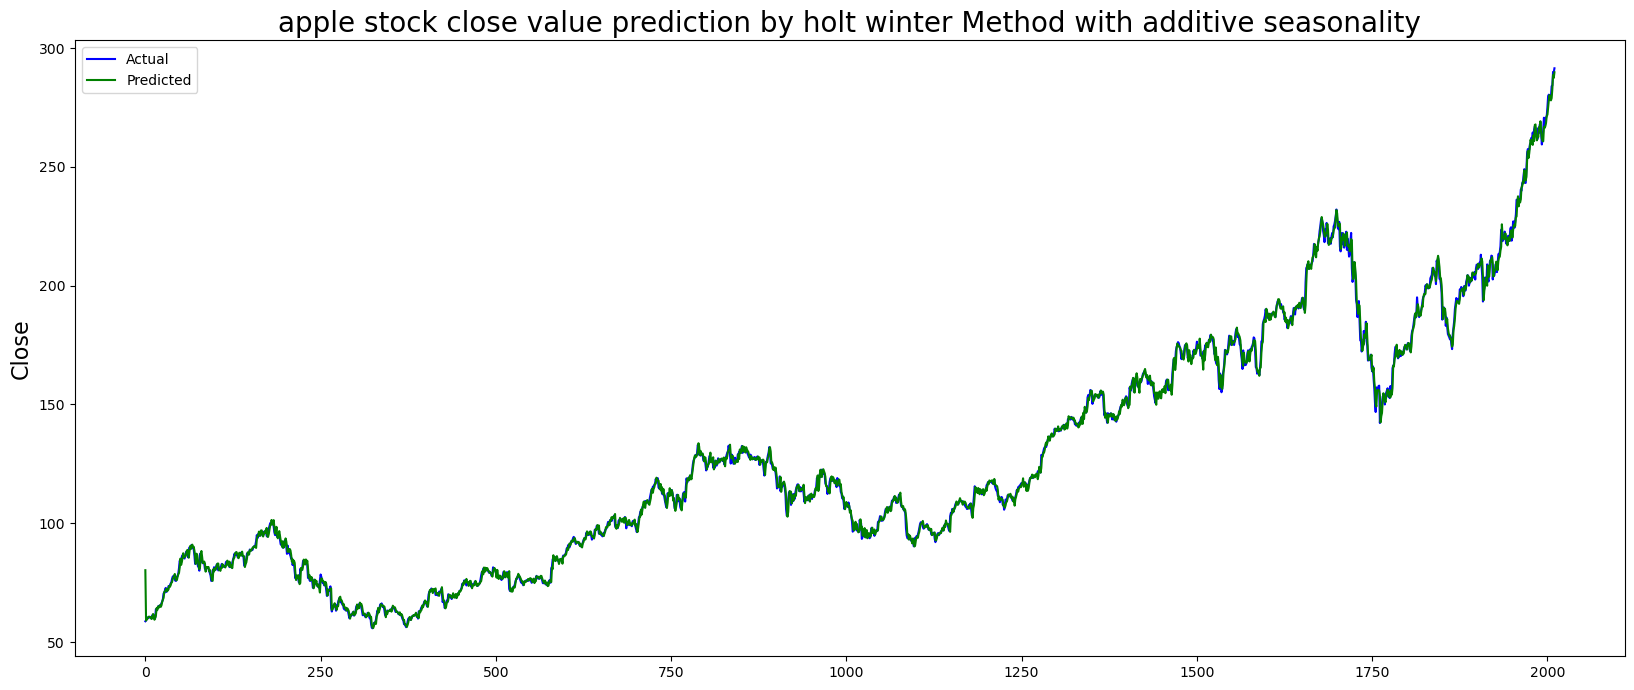

In [54]:
plt.figure(figsize=(20,8))
plt.plot(stock.Close, color='blue',label="Actual")
plt.plot(pred_hwe_muladd_model, color='green',label="Predicted")
plt.title('apple stock close value prediction by holt winter Method with additive seasonality', fontsize=20)
plt.ylabel('Close', fontsize=16)
plt.legend()
plt.show()

In [57]:
#Forecasting for next 30 time periods
final_forecast=hwe_muladd_model.forecast(30)
print(final_forecast)



2011    291.284870
2012    287.650824
2013    279.781489
2014    280.326683
2015    274.311529
2016    271.515266
2017    272.172089
2018    274.648619
2019    274.508082
2020    274.136989
2021    275.782384
2022    276.321079
2023    276.677448
2024    277.112451
2025    275.550926
2026    275.488095
2027    277.436013
2028    277.951711
2029    274.548220
2030    270.665455
2031    274.568007
2032    276.248486
2033    275.433608
2034    279.677027
2035    278.158530
2036    276.895027
2037    278.276653
2038    277.102944
2039    275.981515
2040    278.413905
dtype: float64


<AxesSubplot:>

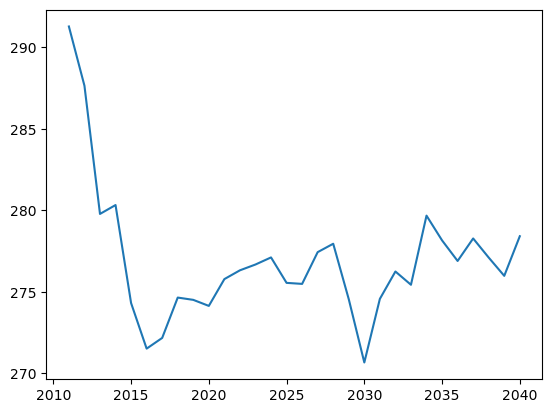

In [58]:
final_forecast.plot()

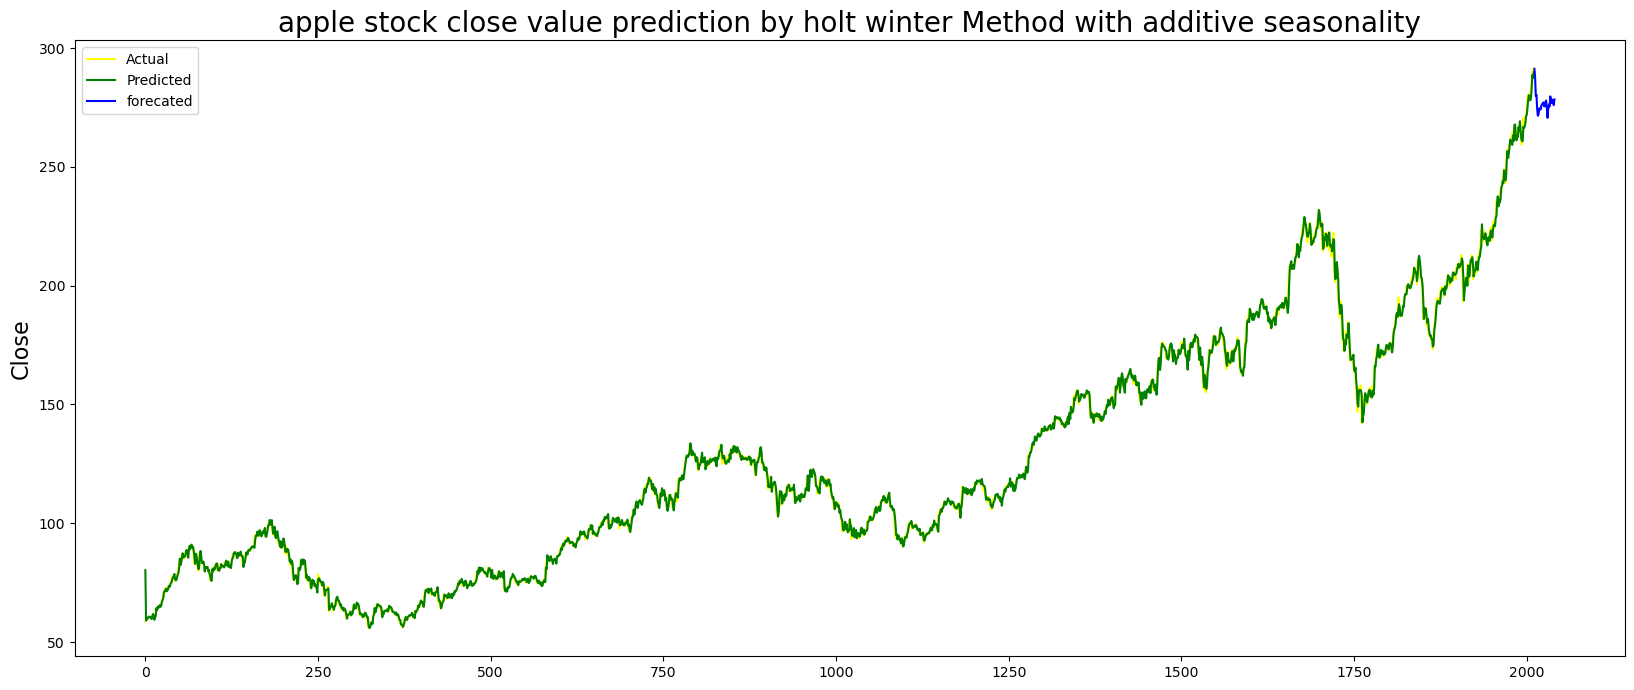

In [60]:
plt.figure(figsize=(20,8))
plt.plot(stock.Close, color='yellow',label="Actual")
plt.plot(pred_hwe_muladd_model, color='green',label="Predicted")
plt.plot(final_forecast, color='blue',label="forecated")
plt.title('apple stock close value prediction by holt winter Method with additive seasonality', fontsize=20)
plt.ylabel('Close', fontsize=16)
plt.legend()
plt.show()

# Final model saving

In [64]:
from pickle import dump
from pickle import load

In [67]:
filename = 'finalized_model.sav'
dump(hwe_muladd_model, open(filename, 'wb'))

In [80]:
loaded_model = load(open(filename, 'rb'))

result = loaded_model.forecast(1)
print(result)

2011    291.28487
dtype: float64
